In [180]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
%matplotlib inline
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [181]:
df=pd.read_csv('file:///F:/CarPrice_Assignment.csv')
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [183]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [184]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [185]:
df.shape

(205, 26)

In [186]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [187]:
CompanyName = df['CarName'].apply(lambda x : x.split(' ')[0])
df.insert(3,"CompanyName",CompanyName)
df.drop(['CarName'],axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [188]:
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [189]:
df.loc[df.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [190]:
df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

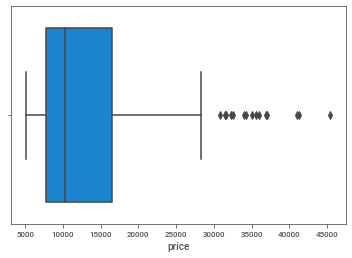

In [191]:
sns.boxplot(df['price'])

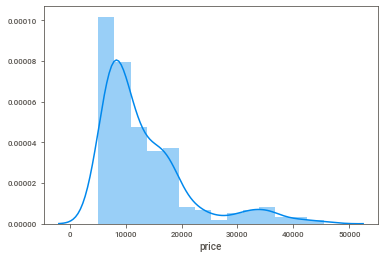

In [192]:
sns.distplot(df['price'])

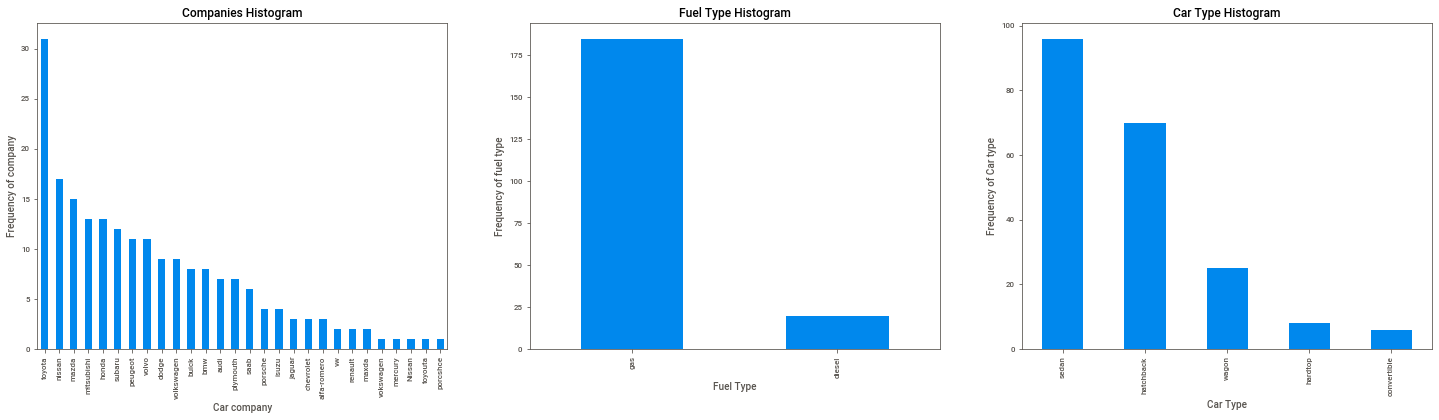

In [193]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = df.CompanyName.value_counts().plot.bar()
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = df.fueltype.value_counts().plot.bar()
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = df.carbody.value_counts().plot.bar()
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

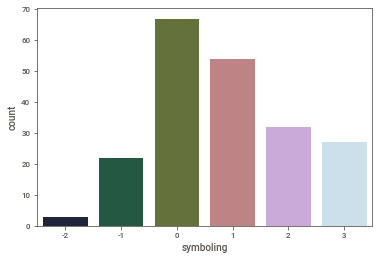

In [194]:
sns.countplot(df['symboling'],palette="cubehelix")

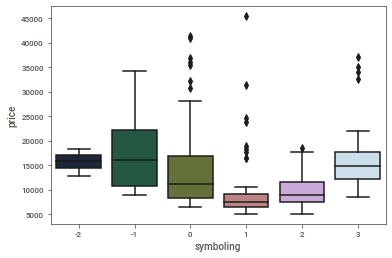

In [195]:
sns.boxplot(x=df.symboling, y=df.price, palette=("cubehelix"))

In [196]:
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


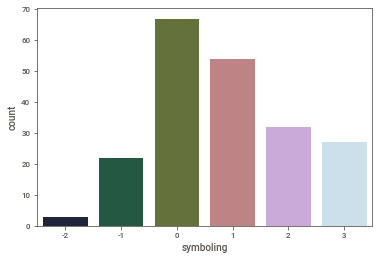

In [197]:
sns.countplot(df['symboling'],palette='cubehelix')

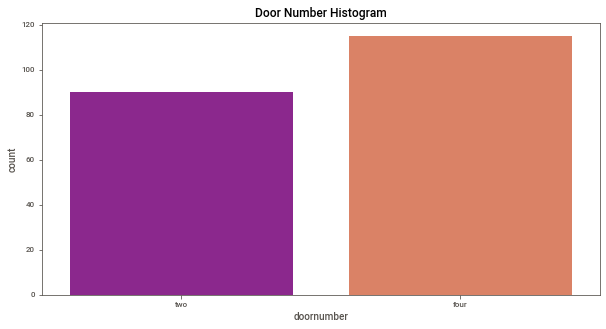

In [198]:
plt.figure(figsize=(10,5))

plt.title('Door Number Histogram')
sns.countplot(df.doornumber, palette=("plasma"))


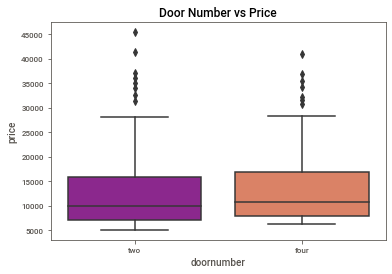

In [199]:
plt.title('Door Number vs Price')
sns.boxplot(x=df.doornumber, y=df.price, palette=("plasma"))

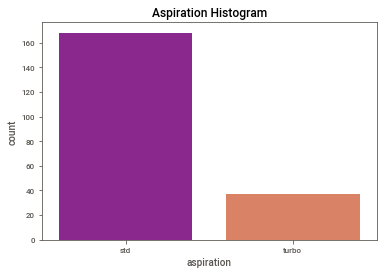

In [200]:
plt.title('Aspiration Histogram')
sns.countplot(df['aspiration'],palette='plasma')

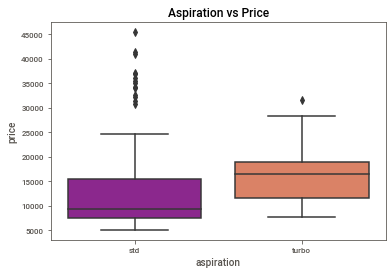

In [201]:
plt.title('Aspiration vs Price')
sns.boxplot(x='aspiration',y='price',data=df,palette='plasma')

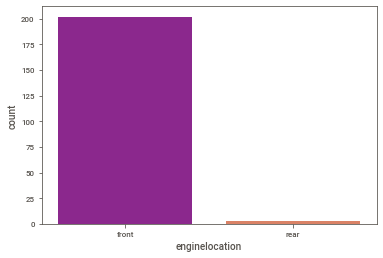

In [202]:
sns.countplot(df['enginelocation'],palette='plasma')

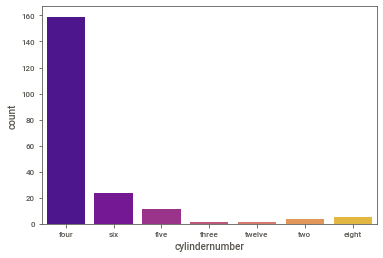

In [203]:
sns.countplot(df['cylindernumber'],palette='plasma')

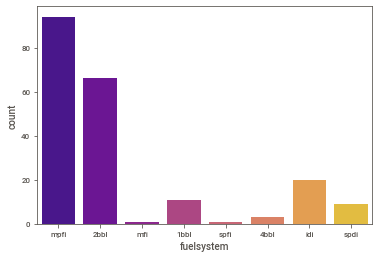

In [204]:
sns.countplot(df['fuelsystem'],palette='plasma')

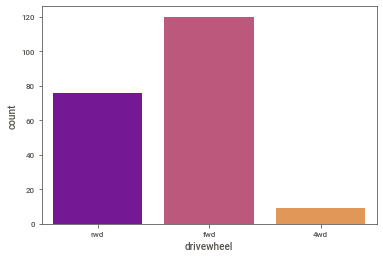

In [205]:
sns.countplot(df['drivewheel'],palette='plasma')

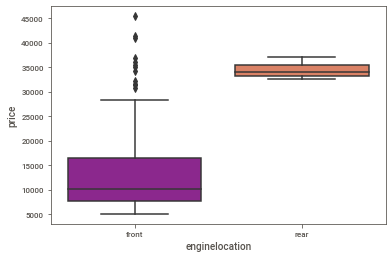

In [206]:
sns.boxplot(x='enginelocation',y='price',data=df,palette='plasma')

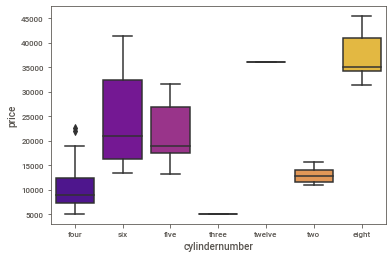

In [207]:
sns.boxplot(x='cylindernumber',y='price',data=df,palette='plasma')

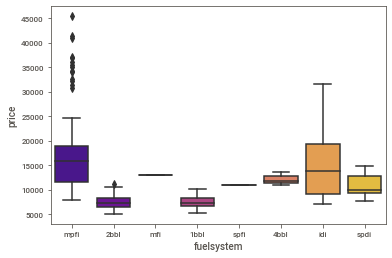

In [208]:
sns.boxplot(x='fuelsystem',y='price',data=df,palette='plasma')

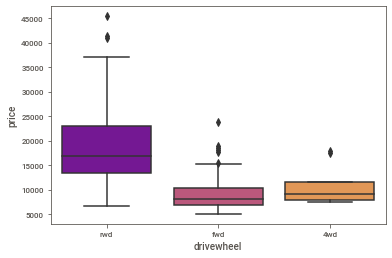

In [209]:
sns.boxplot(x='drivewheel',y='price',data=df,palette='plasma')

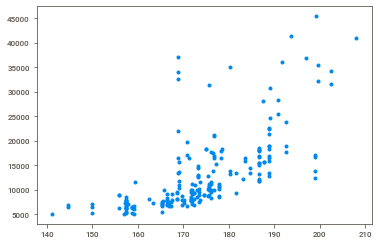

In [210]:
plt.scatter(df[['carlength']],df['price'])

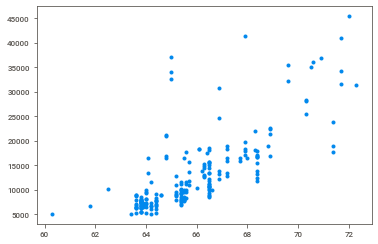

In [211]:
plt.scatter(df[['carwidth']],df['price'])

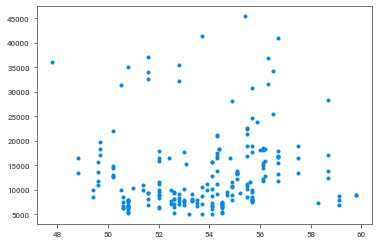

In [212]:
plt.scatter(df[['carheight']],df['price'])

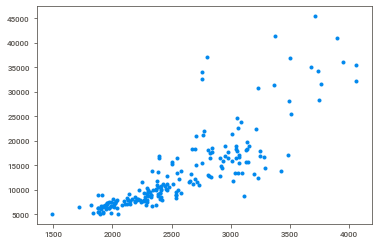

In [213]:
plt.scatter(df[['curbweight']],df['price'])

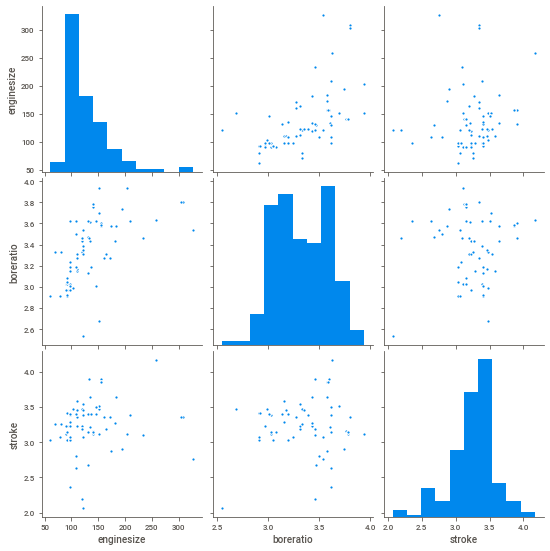

In [214]:
sns.pairplot(df[['enginesize', 'boreratio', 'stroke']],kind='scatter',aspect=1)

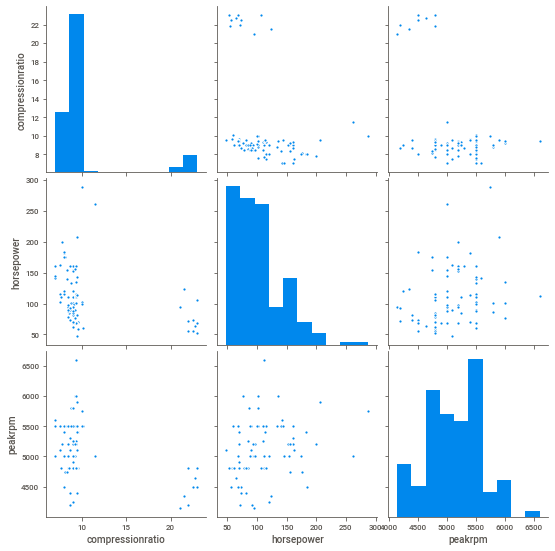

In [215]:
sns.pairplot(df[['compressionratio', 'horsepower', 'peakrpm']])

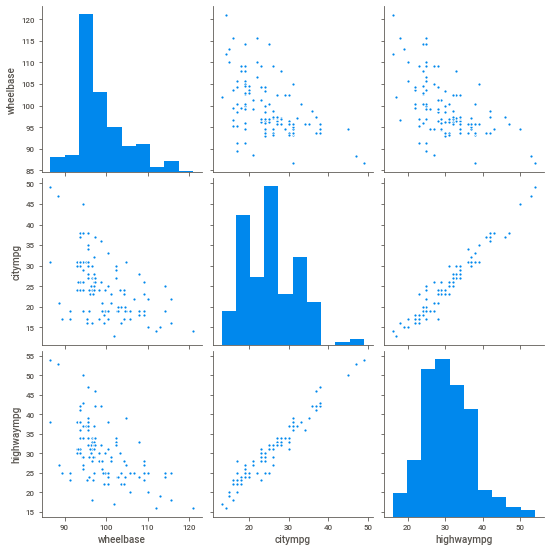

In [216]:
sns.pairplot(df[['wheelbase', 'citympg', 'highwaympg']])

In [217]:
df=df.drop(['car_ID','CompanyName','symboling'],axis=1)

In [218]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [219]:
from sklearn.preprocessing import LabelEncoder

In [220]:
le=LabelEncoder()
df_col=("fueltype","aspiration","doornumber","carbody","drivewheel","enginelocation","enginetype","cylindernumber","fuelsystem")


In [221]:
for i in df_col:
    df[i]=le.fit_transform(df[i])

In [222]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fueltype          205 non-null    int32  
 1   aspiration        205 non-null    int32  
 2   doornumber        205 non-null    int32  
 3   carbody           205 non-null    int32  
 4   drivewheel        205 non-null    int32  
 5   enginelocation    205 non-null    int32  
 6   wheelbase         205 non-null    float64
 7   carlength         205 non-null    float64
 8   carwidth          205 non-null    float64
 9   carheight         205 non-null    float64
 10  curbweight        205 non-null    int64  
 11  enginetype        205 non-null    int32  
 12  cylindernumber    205 non-null    int32  
 13  enginesize        205 non-null    int64  
 14  fuelsystem        205 non-null    int32  
 15  boreratio         205 non-null    float64
 16  stroke            205 non-null    float64
 1

In [224]:
df.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [225]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [226]:
x

array([[1.0e+00, 0.0e+00, 1.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [1.0e+00, 0.0e+00, 1.0e+00, ..., 5.0e+03, 2.1e+01, 2.7e+01],
       [1.0e+00, 0.0e+00, 1.0e+00, ..., 5.0e+03, 1.9e+01, 2.6e+01],
       ...,
       [1.0e+00, 0.0e+00, 0.0e+00, ..., 5.5e+03, 1.8e+01, 2.3e+01],
       [0.0e+00, 1.0e+00, 0.0e+00, ..., 4.8e+03, 2.6e+01, 2.7e+01],
       [1.0e+00, 1.0e+00, 0.0e+00, ..., 5.4e+03, 1.9e+01, 2.5e+01]])

In [227]:
y

array([13495.   , 16500.   , 16500.   , 13950.   , 17450.   , 15250.   ,
       17710.   , 18920.   , 23875.   , 17859.167, 16430.   , 16925.   ,
       20970.   , 21105.   , 24565.   , 30760.   , 41315.   , 36880.   ,
        5151.   ,  6295.   ,  6575.   ,  5572.   ,  6377.   ,  7957.   ,
        6229.   ,  6692.   ,  7609.   ,  8558.   ,  8921.   , 12964.   ,
        6479.   ,  6855.   ,  5399.   ,  6529.   ,  7129.   ,  7295.   ,
        7295.   ,  7895.   ,  9095.   ,  8845.   , 10295.   , 12945.   ,
       10345.   ,  6785.   ,  8916.5  ,  8916.5  , 11048.   , 32250.   ,
       35550.   , 36000.   ,  5195.   ,  6095.   ,  6795.   ,  6695.   ,
        7395.   , 10945.   , 11845.   , 13645.   , 15645.   ,  8845.   ,
        8495.   , 10595.   , 10245.   , 10795.   , 11245.   , 18280.   ,
       18344.   , 25552.   , 28248.   , 28176.   , 31600.   , 34184.   ,
       35056.   , 40960.   , 45400.   , 16503.   ,  5389.   ,  6189.   ,
        6669.   ,  7689.   ,  9959.   ,  8499.   , 

In [228]:
from sklearn.model_selection import train_test_split

In [229]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3)

In [230]:
from sklearn.ensemble import RandomForestRegressor

In [231]:
ran=RandomForestRegressor()
ran.fit(xtrain,ytrain)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [232]:
pre_l=ran.predict(xtest)

In [233]:
from sklearn.metrics import r2_score

In [234]:
r2_score(ytest,pre_l)

0.9468493934120062

In [235]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,1,0,1,0,2,0,88.6,168.8,64.1,48.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,1,2,2,0,94.5,171.2,65.5,52.4,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,1,0,0,3,1,0,99.8,176.6,66.2,54.3,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,1,0,0,3,0,0,99.4,176.6,66.4,54.3,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1,0,0,3,2,0,109.1,188.8,68.9,55.5,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,1,1,0,3,2,0,109.1,188.8,68.8,55.5,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,1,0,0,3,2,0,109.1,188.8,68.9,55.5,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,0,1,0,3,2,0,109.1,188.8,68.9,55.5,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [236]:
import sweetviz as sv

In [237]:
data=sv.analyze(df)
data.show_html('Analyze.html')

                                             |          | [  0%]   00:00 -> (? left)

Report Analyze.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [238]:
from IPython.display import IFrame

In [239]:
IFrame(src='Analyze.html',width=1000,height=600)

In [240]:
from dataprep.eda import *

  0%|          | 0/3974 [00:00<?, ?it/s]

DataPrep Report
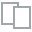
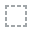
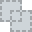
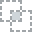
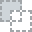
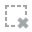
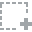
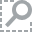
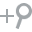
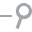
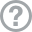
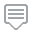
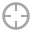
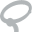
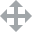
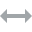
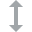
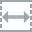
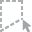
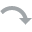
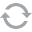
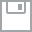
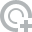
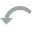
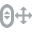
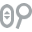
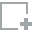
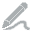
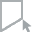
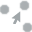
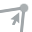
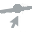

In [241]:
create_report(df)

In [242]:
li=LinearRegression()
li.fit(xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [243]:
li.score(xtest,ytest)

0.8014136872510564

In [246]:
df.columns

Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [245]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [247]:
mns=MinMaxScaler()
feat=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
df[feat]=mns.fit_transform(df[feat])
df[feat]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,0.083333,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.207959
1,1.0,0.0,1.0,0.00,1.0,0.0,0.058309,0.413433,0.316667,0.083333,...,0.260377,0.714286,0.664286,0.290476,0.12500,0.262500,0.346939,0.222222,0.289474,0.282558
2,1.0,0.0,1.0,0.50,1.0,0.0,0.230321,0.449254,0.433333,0.383333,...,0.343396,0.714286,0.100000,0.666667,0.12500,0.441667,0.346939,0.166667,0.263158,0.282558
3,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,0.529851,0.491667,0.541667,...,0.181132,0.714286,0.464286,0.633333,0.18750,0.225000,0.551020,0.305556,0.368421,0.219254
4,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,0.529851,0.508333,0.541667,...,0.283019,0.714286,0.464286,0.633333,0.06250,0.279167,0.551020,0.138889,0.157895,0.306142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,0.641667,...,0.301887,0.714286,0.885714,0.514286,0.15625,0.275000,0.510204,0.277778,0.315789,0.291123
201,1.0,1.0,0.0,0.75,1.0,0.0,0.655977,0.711940,0.708333,0.641667,...,0.301887,0.714286,0.885714,0.514286,0.10625,0.466667,0.469388,0.166667,0.236842,0.345738
202,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,0.641667,...,0.422642,0.714286,0.742857,0.380952,0.11250,0.358333,0.551020,0.138889,0.184211,0.406311
203,0.0,1.0,0.0,0.75,1.0,0.0,0.655977,0.711940,0.716667,0.641667,...,0.316981,0.428571,0.335714,0.633333,1.00000,0.241667,0.265306,0.361111,0.289474,0.430763


In [248]:
std=StandardScaler()
feat=['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price']
df[feat]=std.fit_transform(df[feat])
df[feat]

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.027391
1,0.328798,-0.469295,1.130388,-3.050975,1.213330,-0.121867,-1.690772,-0.426521,-0.844782,-2.020417,...,0.074449,0.869568,0.519071,-1.839377,-0.288349,0.174483,-0.262960,-0.646553,-0.546059,0.404461
2,0.328798,-0.469295,1.130388,-0.717207,1.213330,-0.121867,-0.708596,-0.231513,-0.190566,-0.543527,...,0.604046,0.869568,-2.404880,0.685946,-0.288349,1.264536,-0.262960,-0.953012,-0.691627,0.404461
3,0.328798,-0.469295,-0.884652,0.449677,-0.589081,-0.121867,0.173698,0.207256,0.136542,0.235942,...,-0.431076,0.869568,-0.517266,0.462183,-0.035973,-0.053668,0.787855,-0.186865,-0.109354,0.084485
4,0.328798,-0.469295,-0.884652,0.449677,-2.391492,-0.121867,0.107110,0.207256,0.230001,0.235942,...,0.218885,0.869568,-0.517266,0.462183,-0.540725,0.275883,0.787855,-1.106241,-1.273900,0.523668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,1.398245,0.728239,...,0.339248,0.869568,1.666445,-0.336970,-0.162161,0.250533,0.577692,-0.340094,-0.400490,0.447752
201,0.328798,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,1.351515,0.728239,...,0.339248,0.869568,1.666445,-0.336970,-0.364062,1.416637,0.367529,-0.953012,-0.837195,0.723810
202,0.328798,-0.469295,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,1.398245,0.728239,...,1.109571,0.869568,0.926204,-1.232021,-0.338824,0.757535,0.787855,-1.106241,-1.128332,1.029983
203,-3.041381,2.130854,-0.884652,0.449677,1.213330,-0.121867,1.721873,1.198549,1.398245,0.728239,...,0.435538,-0.126306,-1.183483,0.462183,3.244916,0.047732,-0.683286,0.119594,-0.546059,1.153582
